# Исследование объявлений о продаже квартир

# Описание проекта

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нам нужно определить рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# План исследования:

* считывание файлов с данными;
* предобработка данных;
* проведем исследовательский анализ данных;
* сделаем общий вывод

### Откроем файл с данными и изучим общую информацию

#### Скачаем файл с данными и ознакомимся с ними

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
pd.set_option('display.float_format', '{:.2f}'.format)
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

* как мы видим в данных присутствуют пропущенные значения, судя по тому что разное количество строк в столбцах
* в столбце is_apartment данные представлены как **`object`** а должно быть **`bool`**
* также порядка 5 столбцов хранят данные в виде вещественных значений, хотя могут быть представелны целыми числами

In [16]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


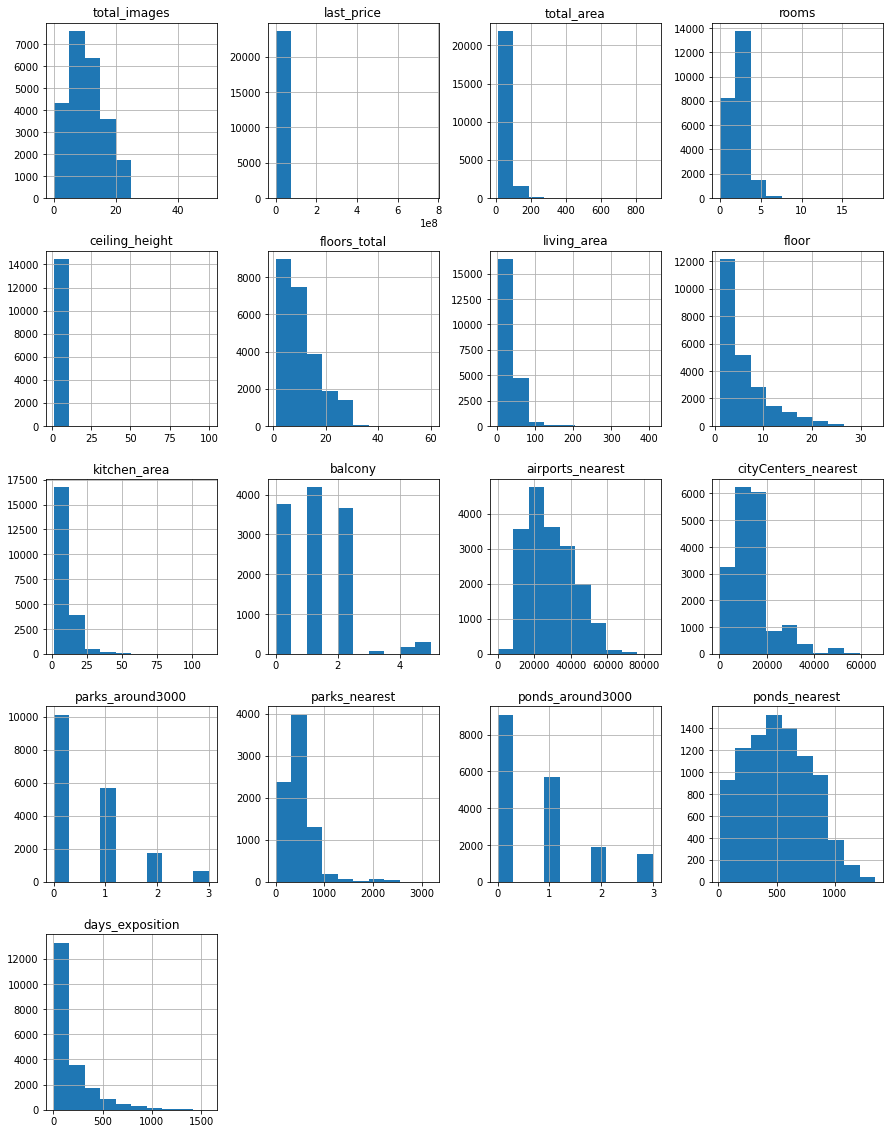

In [17]:
data.hist(figsize=(15, 20))
plt.show()

**Промежуточный вывод**

Мы считали файл с данными о продаже квартир в санкт-петербурге и ближайших районах. В данных имеются 23699 записи. <br>В данных имеются такие проблемы как:
* пропуски в нескольких колонках
* формат типа данных не везде соответствует типу данных
Необходимо сделать предобработку данных, для возможности их дальнейшего анализа.

### Выполним предобработку данных

#### Посмотрим в каких столбцах и сколько у нас пропущенных значений

In [18]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Проверим колонки, содержащие числовые значения, на содержание аномальных значений.

Столбцы которые будем проверить: total_images, last_price, total_area, rooms, floor.

In [21]:
lst = ['total_images', 'last_price', 'total_area', 'rooms', 'floor']
data[lst].describe()

,total_images,last_price,total_area,rooms,floor
count,23699.00,23699.00,23699.00,23699.00,23699.00
mean,9.86,6541548.77,60.35,2.07,5.89
std,5.68,10887013.27,35.65,1.08,4.89
min,0.00,12190.00,12.00,0.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.00
50%,9.00,4650000.00,52.00,2.00,4.00
75%,14.00,6800000.00,69.90,3.00,8.00
max,50.00,763000000.00,900.00,19.00,33.00


Из этих данных вызывают подозрения:
* минимальная цена квартиры 12190, столбец `last_price`
* минимальное знчение количество комнат 0, столбец `rooms`
проверим эти данные, для начале посмотрим на данные квартир, где количество комнат указаное `0`, **`может быть это студии?`**.

Допуская человеческий фактор при заполнении данных в объявлении, проверим на совпадение значений в строках с количеством комнат == `0` и указанными студиями в колонке `studio`.

In [22]:
print(data[data['rooms'] == 0]['studio'].value_counts())
print()
print('Количество объявлений с указанным значением количество комнат = 0:', data[data['rooms'] == 0]['rooms'].count())

True     138
False     59
Name: studio, dtype: int64

Количество объявлений с указанным значением количество комнат = 0: 197


В студии, похоже, нет ни полноценной кухни, ни отдельной жилой комнаты. Возможно, именно поэтому в объявлении не указано ни то ни другое.

Присвоим значение 1 комната для объявлений, где указаны студии

In [23]:
data.loc[(data['rooms'] == 0) & (data['studio'] == True), 'rooms'] = 1

Проверим, сколько и каких у нас осталось объявлений с нулевым значением указанных комнат.

In [24]:
data[data['rooms'] < 1]['rooms'].count()

59

У нас осталось 59 объявлений с `0` значеним в колонке количество комнат. Сгруппируем данные по количеству комнат и посмотрим на распределение общей площади квартир.

In [25]:
data.groupby('rooms')['total_area'].describe().head(10)

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
0,59.00,32.71,44.99,16.00,25.00,26.10,28.25,371.00
1,8185.00,37.48,9.43,12.00,32.20,36.40,41.00,494.10
2,7940.00,55.86,13.20,20.00,46.00,53.00,62.00,196.00
3,5814.00,77.76,23.27,40.10,62.00,73.00,87.00,363.10
4,1180.00,107.61,44.52,42.00,77.80,99.30,125.33,500.00
5,326.00,161.47,69.31,40.00,117.47,146.45,183.75,507.00
6,105.00,201.54,77.81,87.00,152.00,184.30,236.00,500.00
7,59.00,265.33,130.12,100.60,181.70,214.00,347.30,631.20
8,12.00,259.23,69.90,150.00,224.32,235.70,323.98,373.10


Проверим зависимость количества комнат от таких праметров как общая площадь и жилая площадь квартиры.

In [26]:
print(data['rooms'].corr(data['total_area']))
print(data['rooms'].corr(data['living_area']))

0.7594238568530485
0.8489138249706435


Наибольшая зависимость отслеживается от жилой площади, но и от общей площади зависимость не намного меньше, к тому же в этих данных нет пропущенных значений в отличии от жилой площади, где присутствуют `1903` пропуска. Сгруппируем данные по общей площади, и присвоем медианное значение количества комнат, квартирам, где указано количество комнат `0`, и проверим, получилось нам заменить все нулевые значения.

In [27]:
data.loc[data['rooms'] == 0, 'rooms'] = data.groupby('total_area')['rooms'].transform('median').loc[data['rooms'] == 0] 

In [28]:
data[data['rooms'] < 1]['rooms'].count()

16

От `197` нулевых значений осталось `16`. Вернемся к этому параметру после заполнения пропусков в столбце `жилая площадь`, и после также сгруппируем и присвоем медианное значение оставшимся нулевым значениям количества комнат.

Теперь, то что касается минимальной цены квартиры в `12190`, это явно аномальное значение. Посмотрим на разброс цен в целом.

In [29]:
data['last_price'].describe()

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

В 1м квартиле цены до 3.4млн, медианое значение цен 4.65млн, среднее 6.54млн. В целом с данными все в порядке, посмотрим на объявления с ценами квартир до 400000

In [30]:
data[data['last_price'] < 400000].sort_values('last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.00,109.00,2019-03-20T00:00:00,2.00,2.75,25.00,32.00,25,NaN,...,40.50,NaN,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,NaN,8.00


В данном случае мы имеем одно объявление с таким аномальным значением цены. Квартира 2х комнатная, находится недалеко от цетра `санкт-петербурга`, с площадью `109 кв. м`. Посмотрим сводную статистику цен по квартирам в `санкт-петербурге` с такой же площадью.

In [31]:
data.loc[(data['locality_name'] == 'Санкт-Петербург') & (data['total_area'] == 109), 'last_price'].describe()

count         22.00
mean    15074008.64
std      7789573.75
min        12190.00
25%     11000000.00
50%     13350000.00
75%     19714500.00
max     38000000.00
Name: last_price, dtype: float64

По сводной статистике видно что в первом квартиле находятся значения цен до `11млн руб`, медианое значение` 13.35млн`. Отсюда можно сделать вывод что скорее всего при заполнении объявления были пропущены нули. Цена вполне вписывается между `1 и 2` квартилями если ее увеличить на `3` порядка, что мы и предпримем.

In [32]:
data.loc[data['last_price'] == 12190.0, 'last_price'] = data.loc[data['last_price'] == 12190.0, 'last_price'] * 1000

#### Проверим уникальные значения высоты потолков

In [35]:
data['ceiling_height'].sort_values().unique()

array([2.  , 2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48,
       2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59,
       2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 ,
       2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81,
       2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92,
       2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03,
       3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14,
       3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26,
       3.27, 3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37,
       3.38, 3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49,
       3.5 , 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 ,
       3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78,
       3.8 , 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95,
       3.98, 4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.

Как видно из представленных уникальных значечний высоты потолков квартир, в данных присутствуют артефакты:

* высота потолков ниже `2м`
* высота потолков выше `8.3м`

Во всех случаях возможен человеческий фактор при заполнении данных, возможно опечатка.
В первом случае удалим строки с такими значениями высоты потолков, это всего лишь 3 квартиры, особого влияния на результат отчета они не будут иметь.
Во втором случае, допускается что все что выше `20 метров` включительно при опечатке допущено смещение десятичной точки, исправим эти значения уменьшив их на `1 порядок`. В остальных случаях от `10.3м до 14` включительно, `100м` также как и в первом удалим. 

In [34]:
data = data.drop(data.query('ceiling_height < 2 or 15 > ceiling_height > 10.2 or ceiling_height == 100').index)
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10

 Заменим пропуски в столбце высоты потолков на медианное значение высоты

In [36]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#### Удалим строки с пропусками в данных "название населенного пункта" и "всего этажей в доме"

Данные пропуски нам заполнить нечем, в совокупности они составляют менее `1%` от всех данных, так что на результат это не должно повлиять.

In [37]:
data = data.dropna(subset=['floors_total', 'locality_name'])

Проверим колонку `всего этажей` на наличие **артефактов**, а также посмотрим на общую статистику разброса данных

In [38]:
data['floors_total'].describe()

count   23559.00
mean       10.67
std         6.59
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

Как мы видим все в нормальных пределах

#### Приступим к заполнению пропусков в колонке `жилая площадь`

Для начала проверим зависимость имеющихся данных `жилой площади` от данных `общая площадь` и от данных `количество комнат`

In [39]:
data['living_area'].corr(data['total_area'])

0.9397714137715976

In [40]:
data['living_area'].corr(data['rooms'])

0.850080050367091

Как мы видим имеется сильная кореляция от обоих параметров. 

Проверим на корректность наши данные по жилой площади. Проверим, сходятся ли значения между общей площадью и суммой жилой площади и кухни, нет ли превышения этих сумм над жилой площадью. А также количество пропусков в колонке жилая площадь.

In [41]:
print(data[data['total_area'] < data['living_area'] + data['kitchen_area']].shape[0])
print(data['living_area'].isna().sum())

64
1865


`64` объявления содержат не корректные данные, и `1865` пропусков в данных. Заполним пропуски в данных, а также исправим данные. Для начала вычислим средний коэффициент отношения жилой площади к общей. Далее через условие присвоем значение произведения коэффициента к общей площади по тем объявлениям где присутствуют пропуски в колонке жилой площади и имеются некорректные данные

In [42]:
k_living = (data['living_area'] / data['total_area']).mean().round(2)
k_living

0.56

In [43]:
condition = ((data['living_area'].isna()) | ((data['total_area']) < data['living_area'] + data['kitchen_area']))
data.loc[condition, 'living_area'] = (data.loc[condition, 'total_area']) * k_living

Проверим остались ли пропуски в колонке, некорректные данные.

In [44]:
print(data['living_area'].isna().sum())
print(data[data['total_area'] < data['living_area'] + data['kitchen_area']].shape[0])

0
19


`19` объявлений с некорректными данными по отношению площадей в квартире, предположим что это связано с некорректно указанной площадью кухни. Посмотрим на эти объявления.

In [45]:
data[data['total_area'] < data['living_area'] + data['kitchen_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
696,1,3364930.00,34.69,2014-11-27T00:00:00,1.00,2.64,25.00,19.43,25,NaN,...,23.43,2.00,Санкт-Петербург,43396.00,12153.00,0.00,NaN,0.00,NaN,574.00
1407,9,3250000.00,24.60,2018-06-29T00:00:00,1.00,2.65,25.00,13.78,16,NaN,...,18.20,NaN,Санкт-Петербург,35250.00,16414.00,0.00,NaN,1.00,400.00,96.00
2869,6,16000000.00,73.00,2018-10-22T00:00:00,2.00,2.65,6.00,40.88,4,NaN,...,35.00,NaN,Санкт-Петербург,23756.00,3322.00,0.00,NaN,1.00,859.00,115.00
4366,15,5000000.00,47.70,2018-09-09T00:00:00,2.00,2.68,13.00,26.71,12,NaN,...,28.20,1.00,Санкт-Петербург,13881.00,12677.00,0.00,NaN,0.00,NaN,19.00
5297,19,45000000.00,96.00,2018-11-15T00:00:00,2.00,3.20,6.00,53.76,4,True,...,45.00,1.00,Санкт-Петербург,21860.00,318.00,2.00,160.00,3.00,569.00,NaN
7239,10,9990000.00,90.00,2016-06-13T00:00:00,3.00,3.10,6.00,50.40,6,False,...,43.40,3.00,Санкт-Петербург,33358.00,13171.00,0.00,NaN,2.00,118.00,630.00
7755,1,1811250.00,20.67,2016-03-28T00:00:00,1.00,2.65,24.00,11.58,13,NaN,...,14.95,1.00,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,98.00
10391,7,2650000.00,48.00,2017-12-23T00:00:00,1.00,3.00,4.00,26.88,2,NaN,...,26.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,43.00
10725,12,3000000.00,25.60,2017-05-24T00:00:00,1.00,2.70,18.00,14.34,13,NaN,...,14.17,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,558.00
10834,5,3930000.00,35.90,2019-04-18T00:00:00,1.00,2.65,24.00,20.10,21,NaN,...,15.90,2.00,Санкт-Петербург,41929.00,21245.00,0.00,NaN,1.00,500.00,NaN


Действительно, видно что значения площади кухни в ряде случаев превышают жилую площадь, это не является нормой. Оставим это до заполнения пропусков по данным площади кухни. А сейчас рассмотрим сводную статистику по жилой площади.

In [46]:
data['living_area'].describe()

count   23559.00
mean       34.50
std        22.32
min         2.00
25%        19.00
50%        30.00
75%        42.00
max       409.70
Name: living_area, dtype: float64

Посмотрим на данные, в которых жилая площадь меньше 9 кв.м.

In [47]:
data[data['living_area'] < 9]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000.00,21.40,2019-02-07T00:00:00,1.00,2.90,8.00,8.30,7,NaN,...,6.30,NaN,Санкт-Петербург,27089.00,5791.00,2.00,488.00,1.00,286.00,NaN
2309,10,4200000.00,62.40,2017-06-15T00:00:00,2.00,2.60,9.00,8.40,6,NaN,...,41.00,2.00,посёлок Шушары,23662.00,29448.00,0.00,NaN,0.00,NaN,111.00
3242,7,4440000.00,41.00,2017-07-02T00:00:00,1.00,2.65,17.00,3.00,17,NaN,...,11.00,NaN,Санкт-Петербург,19272.00,13073.00,0.00,NaN,0.00,NaN,216.00
12040,5,1900000.00,15.00,2018-06-27T00:00:00,1.00,2.50,5.00,8.40,1,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.00
13915,20,6350000.00,52.00,2018-02-06T00:00:00,2.00,3.00,6.00,2.00,2,NaN,...,9.00,NaN,Санкт-Петербург,32453.00,6521.00,0.00,NaN,1.00,1012.00,91.00
16431,13,3799000.00,31.00,2018-04-12T00:00:00,1.00,2.60,5.00,6.00,1,NaN,...,17.00,NaN,Санкт-Петербург,32177.00,4826.00,1.00,430.00,0.00,NaN,168.00
16949,9,1550000.00,15.00,2018-08-21T00:00:00,1.00,2.70,9.00,8.40,1,NaN,...,NaN,NaN,Санкт-Петербург,51048.00,16376.00,0.00,NaN,1.00,1079.00,42.00
17248,20,5300000.00,33.00,2017-04-14T00:00:00,1.00,2.70,22.00,8.90,16,NaN,...,16.10,1.00,Санкт-Петербург,33803.00,13671.00,0.00,NaN,0.00,NaN,216.00
17582,11,2680000.00,22.00,2018-08-11T00:00:00,1.00,2.65,25.00,5.00,8,NaN,...,NaN,2.00,Санкт-Петербург,22735.00,11618.00,1.00,835.00,1.00,652.00,70.00
17961,3,1400000.00,13.00,2017-12-03T00:00:00,1.00,2.60,9.00,7.28,1,NaN,...,NaN,NaN,Санкт-Петербург,14350.00,15945.00,0.00,NaN,1.00,185.00,410.00


`19` квартир, небольшое количество данных с аномальными данными жилой площади. Удалим эти данные

In [48]:
data = data[data['living_area'] >= 9]

Вернемся к нашим данным с нулевым значением количества комнат. Заполним оставшиеся ммедианым значением после группировке по жилой площади, проверим.

In [49]:
data.loc[data['rooms'] == 0, 'rooms'] = data.groupby('living_area')['rooms'].transform('median').loc[data['rooms'] == 0] 

In [50]:
data[data['rooms'] < 1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
780,9,2600000.00,26.10,2018-02-20T00:00:00,0.00,2.65,18.00,14.62,8,NaN,...,NaN,1.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.00
1625,7,1980000.00,23.98,2018-02-01T00:00:00,0.50,2.65,4.00,10.50,3,NaN,...,NaN,1.00,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.00
6612,18,3590000.00,26.80,2017-11-10T00:00:00,0.50,2.65,24.00,19.00,20,NaN,...,NaN,NaN,Санкт-Петербург,11022.00,12679.00,0.00,NaN,0.00,NaN,15.00
15273,9,2700000.00,25.20,2017-11-10T00:00:00,0.50,2.65,9.00,15.20,2,NaN,...,NaN,2.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,23.00
18042,15,2950000.00,25.90,2017-12-09T00:00:00,0.50,2.65,14.00,16.90,9,NaN,...,NaN,2.00,Санкт-Петербург,23239.00,12102.00,1.00,1021.00,1.00,893.00,45.00
19392,5,71000000.00,371.00,2018-07-26T00:00:00,0.00,3.57,7.00,207.76,6,NaN,...,NaN,NaN,Санкт-Петербург,25257.00,6060.00,1.00,761.00,1.00,584.00,90.00
19917,5,2340000.00,25.41,2017-09-29T00:00:00,0.50,2.65,25.00,18.50,13,NaN,...,NaN,0.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,3.00
20793,13,3600000.00,27.50,2017-11-10T00:00:00,0.50,2.65,24.00,19.00,23,NaN,...,NaN,2.00,Санкт-Петербург,11555.00,12099.00,0.00,NaN,1.00,527.00,74.00


В оставшихся данных преобладает значение `0.5 комнаты`, это очень странно, удалим данные строки, и проверим данные.

In [51]:
data = data[data['rooms'] >= 1]
data[data['rooms'] < 1]['rooms'].count()

0

#### Посмотрим из каких значений состоит столбец `is_appartment`

In [52]:
data['is_apartment'].value_counts()

False    2709
True       49
Name: is_apartment, dtype: int64

Как видно из ранее представленой информации о пропущенных значениях в столбцах и здесь, пропущенные знначения составляют почти `90%`. Для нашего исследования ифнормация из данного столбца особой влияния не окажет, поэтому исключим его из наших данных.

In [53]:
del data['is_apartment']

In [54]:
data = data.reset_index(drop=True)

#### Перейдем к пропускам в столбце 'kıtchen_area', площадь кухни

В данном столбце присутствуют 2217 пропущенных значений, цифра значительная поэтому игнорировать ее нельзя. Также площадь кухни является одним из ключевых факторов при выборе квартиры. Для заполнения данных пропусков нам необходимо выявить максимальную зависимость данного параметра от других. Проверим корреляцию площади кухни от таких параметров как: жилая площадь, общая площадь квартиры.

In [55]:
data['kitchen_area'].corr(data['living_area'])

0.43636403463206347

In [56]:
data['kitchen_area'].corr(data['total_area'])

0.6102105381633018

In [57]:
print(data['open_plan'].value_counts()) 

False    23473
True        59
Name: open_plan, dtype: int64


Также проверим сколько пропущенных значений площади кухни квартиры совпадают с указанными студиями и свободными планировками в данных. Предположим что при свободной планировке и квартиры-студии допускается что могли не указывать площадь кухни, так как она составляет единое пространство с одной из комнат либо со всей квартирой в целом.

In [58]:
data[data['kitchen_area'].isna()].groupby('studio').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
studio,,,,,,,,,,,,,,,,,,,,
False,2062,2062,2062,2062,2062,2062,2062,2062,2062,2062,0,604,2062,1414,1416,1416,641,1416,754,1877
True,144,144,144,144,144,144,144,144,144,144,0,90,144,90,90,90,19,90,49,130


In [59]:
data[data['kitchen_area'].isna()].groupby('open_plan').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
open_plan,,,,,,,,,,,,,,,,,,,,
False,2147,2147,2147,2147,2147,2147,2147,2147,2147,2147,0,646,2147,1471,1473,1473,651,1473,782,1948
True,59,59,59,59,59,59,59,59,59,59,0,48,59,33,33,33,9,33,21,59


Заполним порпуски в данных площади кухни совпадающие с квартирами студиями и со свободной планировкой нулевым значением.

In [60]:
data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True), 'kitchen_area'] = 0

In [61]:
data.loc[(data['kitchen_area'].isna()) & (data['open_plan'] == True), 'kitchen_area'] = 0

In [62]:
data[data['kitchen_area'].isna()].shape[0]

2003

`2003` пропусков в данных, а также из предыдущего этапа у нас остались некорректные данные по площади кухни. Заполним пропуски в данных, а также исправим данные по аналогии с исправлением значений жилой площади. Вычислим средний коэффициент отношения площади кухни к общей. Далее через условие присвоим значение произведения коэффициента к общей площади по тем объявлениям где присутствуют пропуски в колонке площади кухни и имеются некорректные данные

In [63]:
k_kitchen = (data['kitchen_area'] / data['total_area']).mean().round(2)
k_kitchen

0.19

In [64]:
condition_k = ((data['kitchen_area'].isna()) | ((data['total_area']) < data['living_area'] + data['kitchen_area']))
data.loc[condition_k, 'kitchen_area'] = (data.loc[condition_k, 'total_area']) * k_kitchen

Проверим корректность наших данных. Если такие остались посмотрим на них.

In [65]:
data[data['total_area'] < data['living_area'] + data['kitchen_area']].shape[0]

31

In [66]:
data[data['total_area'] < data['living_area'] + data['kitchen_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
421,14,11500000.00,98.00,2016-05-10T00:00:00,3.00,2.65,3.00,88.00,3,False,...,18.62,1.00,Санкт-Петербург,39363.00,13270.00,0.00,NaN,0.00,NaN,90.00
2705,10,3900000.00,68.00,2018-03-13T00:00:00,3.00,4.00,2.00,57.00,1,False,...,12.92,NaN,Кронштадт,68341.00,50067.00,3.00,286.00,3.00,153.00,264.00
2942,9,2550000.00,32.00,2017-12-02T00:00:00,1.00,2.65,14.00,30.20,13,False,...,6.08,1.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,157.00
3597,16,4000000.00,75.03,2014-12-15T00:00:00,2.00,2.53,3.00,66.22,3,False,...,14.26,0.00,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,588.00
4313,19,6900000.00,72.00,2019-03-25T00:00:00,3.00,3.50,4.00,70.00,1,False,...,13.68,NaN,Санкт-Петербург,31487.00,4466.00,2.00,353.00,1.00,439.00,22.00
6021,11,11950000.00,100.00,2019-01-31T00:00:00,3.00,2.98,10.00,89.10,2,False,...,19.00,2.00,Санкт-Петербург,38642.00,12548.00,0.00,NaN,0.00,NaN,40.00
6392,9,1590000.00,23.00,2018-07-10T00:00:00,1.00,3.00,18.00,19.00,1,False,...,4.37,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,67.00
7010,4,2650000.00,23.30,2017-11-25T00:00:00,1.00,2.65,12.00,20.00,10,False,...,4.43,NaN,Санкт-Петербург,20381.00,19383.00,0.00,NaN,1.00,579.00,355.00
7371,0,6500000.00,67.00,2017-06-17T00:00:00,2.00,2.65,18.00,63.00,18,False,...,12.73,NaN,Санкт-Петербург,18428.00,16134.00,1.00,739.00,1.00,758.00,298.00
7810,11,150000000.00,230.00,2017-10-25T00:00:00,8.00,2.65,8.00,220.00,8,False,...,43.70,NaN,Санкт-Петербург,25525.00,5845.00,2.00,116.00,0.00,NaN,135.00


In [67]:
(data[data['total_area'] < data['living_area'] + data['kitchen_area']]['living_area'] \
/ data[data['total_area'] < data['living_area'] + data['kitchen_area']]['total_area']).mean()

0.8764443975776444

По нашим оставшимся некорректным данным видно что значение жилой площади завышена, и составляет среднем почти `90%` от общей. Это объясняется изменением площади кухни и заполнением пропусков. Исправим это применив повторно предыдущий способ для жилой площади.

In [68]:
condition = ((data['living_area'].isna()) | ((data['total_area']) < data['living_area'] + data['kitchen_area']))
data.loc[condition, 'living_area'] = (data.loc[condition, 'total_area']) * k_living

Проверим пропуски и корректность данных.

In [69]:
print(data[data['kitchen_area'].isna()].shape[0])
print(data[data['total_area'] < data['living_area'] + data['kitchen_area']].shape[0])

0
0


Проверим данные площади кухни на содержание аномальных значений

In [70]:
data['kitchen_area'].describe()

count   23532.00
mean       10.52
std         6.12
min         0.00
25%         7.00
50%         9.01
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

Здесь у нас все нормально

#### Приступим к обработке пропусков в столбце с количеством балконов.

Здесь мы имеем почти `50%` пропусков данных значений.

Балконы в целом в `санкт-петербурге` не столь распространены как в `регионах России`, и в новостройках их становиться все меньше.
Пропущенные значения в объявлениях могут означать что балконы отсутствуют. Заполним эти пропущенные значения на `0`.

In [71]:
data.loc[data['balcony'].isna(), 'balcony'] = 0

Убедимся в том что пропуски в столбце 'balcony' полностью заполнены

In [72]:
data['balcony'].isna().sum()

0

#### Приступим к изучению пропусков данных в столбцах данных расстояний до центра города

Начнем с поиска неявных дупликатов в названии населенных пунктов.

In [73]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Подсчитаем количество уникальных названий населенных пунктов

In [74]:
data['locality_name'].nunique()

363

Приведем все к нижнему регистру. Дополнительно заменим все буквы **"ё" на "е"**, а также уберем дополнения перед названиями населенных пунктов, таких как: **"село", "поселок", "деревня", "поселок городского типа"** и т.д. Эти действия помогут нам избавиться от неявных дуюликатов в названиях населенных пунктов

In [75]:
data['locality_name'] = data['locality_name'].str.lower()

In [76]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['деревня ', 'поселок городского типа ', 'городской поселок ', 'городской поселок ', 'поселок станции ', 'село ', 'поселок '], '', regex=True)
)

Проверим насколько изменилось количество уникальных названий населенных пунктов

In [77]:
data['locality_name'].nunique()

309

Посмотрим на пропущенные данные в колонке "расстояние до центра города", и сгрупируем их по названиям населнных пунктов с сортировкой на убывание

In [78]:
print(data[data['cityCenters_nearest'].isna()].value_counts('locality_name').head(10))
print()
print(data['cityCenters_nearest'].isna().sum())

locality_name
мурино             584
кудрово            468
всеволожск         398
гатчина            307
выборг             237
новое девяткино    143
сертолово          142
кириши             125
бугры              113
сланцы             112
dtype: int64

5494


Как мы видим основная часть пропущенных значений содержиться в первых `18` населенных пунктах. Доля пропусков в общих данных составляет `25%`, цифра существенная, как и параметр.

Данные собирались в автоматическом режиме, видимо из-за сбоя их не хватает. Заполнить данные пропуски нам нечем, оставим их.

In [79]:
data['cityCenters_nearest'].describe()

count   18038.00
mean    14196.37
std      8616.57
min       181.00
25%      9238.00
50%     13102.50
75%     16293.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

И здесь у нас тоже все в пределах нормы

#### Приступим к изучению пропусков данных в столбце `сколько дней было размещено объявление` 

In [80]:
data[data['days_exposition'].isna()].value_counts('locality_name').head(10)

locality_name
санкт-петербург    2072
пушкин               62
всеволожск           59
гатчина              39
мурино               39
шушары               32
кириши               32
кудрово              31
колпино              30
выборг               29
dtype: int64

Мы сделали фильтрацию пропущенных значений в колонке `days_exposition`, и сгруппировали их по назанию населенного пунка с сортировкой по убыванию. 
Как мы видим основную часть пропущенных значений в колонке `days_exposition` составляет населенный пункт - `санкт-петербург`.
Проверим сколько объявлений в наших данных с населенным пунктом `санкт-петербург`.

In [81]:
data.value_counts('locality_name').head(15)

locality_name
санкт-петербург    15626
мурино               584
кудрово              468
шушары               438
всеволожск           398
пушкин               369
колпино              338
парголово            327
гатчина              307
выборг               237
петергоф             201
сестрорецк           183
красное село         176
новое девяткино      143
сертолово            142
dtype: int64

Основная часть объявлений составляет населеный пункт `санкт-петербург`, около `66%` от общего объема данных. Это значительная часть объявлений. `13%` по этому населенномункту пропущены данные по информации о дней размещении объявления. Посмотрим на разброс.

In [82]:
data.loc[(data['locality_name'] == 'санкт-петербург'), 'days_exposition'].describe()

count   13554.00
mean      182.85
std       224.74
min         1.00
25%        42.00
50%        95.00
75%       231.75
max      1572.00
Name: days_exposition, dtype: float64

Эти данные мы также не можем заполнить, так как это связано с статистикой дней проодажи, и есть вероятность того что данные объявления фактически не были закрыты на момент выгрузки данных.

#### Приступим к изучению пропусков данных в столбце "расстояние до ближайшего парка" 

Посмотрим на пропуски в данной колонке, как они распределены по населенным пунктам

In [83]:
data[data['parks_nearest'].isna()].value_counts('locality_name').head(15)

locality_name
санкт-петербург    8390
мурино              584
кудрово             468
шушары              438
всеволожск          398
парголово           317
гатчина             307
выборг              237
колпино             205
пушкин              157
новое девяткино     143
сертолово           142
красное село        131
кириши              125
ломоносов           117
dtype: int64

Как видно, основну часть пропущенных данных составляет населенный пункт `санкт-петербург`. Остальные населеные пункты также находятся в пределах `санкт-петербурга`, который насыщен всевозможными парками. Посмотррим на статистику данных расстояний до ближайшего парка по городу `санкт-петербург`

In [84]:
data.loc[(data['locality_name'] == 'санкт-петербург'), 'parks_nearest'].describe()

count   7236.00
mean     498.31
std      344.30
min        1.00
25%      295.00
50%      460.00
75%      619.00
max     3190.00
Name: parks_nearest, dtype: float64

Среднее значение не сильно отличается от медианного, значит разброс небольшой по основному колличеству.

Пропущенные значения в колонке расстояние до ближайшего парка скорее всего говорят о том что поблизости парка нет. Оставим их незаполнеными. 

#### Приступим к изучению пропусков в столбцах количество парков и водоемов в радиусе 3км

Сравним совпадение пропусков в строках по столбцам между расстоянием до водоема и количество водоемов в радиусе 3км, и аналогично для парков

In [85]:
data[['parks_nearest', 'parks_around3000']].isna().all(axis=1).sum()

5493

In [86]:
data[['ponds_nearest', 'ponds_around3000']].isna().all(axis=1).sum()

5493

In [87]:
data[['parks_nearest', 'parks_around3000', 'ponds_nearest', 'ponds_around3000']].isna().sum()

parks_nearest       15517
parks_around3000     5493
ponds_nearest       14512
ponds_around3000     5493
dtype: int64

Как и с парками, пропуски по ближайшим водоемам могут гооворить нам о том что их нет поблизости скорее всего, соответственно совпадающие строки в колонках по количеству в радиусе `3км` водоемов и парков можно заполнить `0`.

In [88]:
data.loc[
    (data['parks_around3000'].isna()) & (data['parks_nearest'].isna()),
    'parks_around3000'
] = 0

data.loc[(data['ponds_around3000'].isna()) & (data['ponds_nearest'].isna()),
    'ponds_around3000'
] = 0

По остальным пропускам: расстояние до ближайшего водоема, расстояние до аэропорта -  по аналогии с расстоянием до ближайшего парка, оставим так как есть данные.

In [89]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5517
cityCenters_nearest      5494
parks_around3000            0
parks_nearest           15517
ponds_around3000            0
ponds_nearest           14512
days_exposition          3169
dtype: int64

#### Изменение типа данных в колонках датафрейма

Для лучшего визуального восприятия информации и работы с данными изменим тип данных с вещественного на целое в колонках: цена, количество дней размещения объявления, количество балконов, количество этажей в доме, число парков и водоемов в радиусе `3км`.
Также изменим тип данных в колонке **дата размещения** c `object на datetime64`.

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23532 entries, 0 to 23531
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23532 non-null  int64  
 1   last_price            23532 non-null  float64
 2   total_area            23532 non-null  float64
 3   first_day_exposition  23532 non-null  object 
 4   rooms                 23532 non-null  float64
 5   ceiling_height        23532 non-null  float64
 6   floors_total          23532 non-null  float64
 7   living_area           23532 non-null  float64
 8   floor                 23532 non-null  int64  
 9   studio                23532 non-null  bool   
 10  open_plan             23532 non-null  bool   
 11  kitchen_area          23532 non-null  float64
 12  balcony               23532 non-null  float64
 13  locality_name         23532 non-null  object 
 14  airports_nearest      18015 non-null  float64
 15  cityCenters_nearest

In [91]:
data_column_list = ['last_price', 'balcony', 'days_exposition', 'floors_total']
for d in data_column_list:
    if data[d].notna().all():
        data[d] = data[d].astype('Int64')
    else:
        continue

In [92]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3.00,2.70,16,51.00,8,False,...,25.00,0,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000,40.40,2018-12-04T00:00:00,1.00,2.65,11,18.60,1,False,...,11.00,2,шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000,56.00,2015-08-20T00:00:00,2.00,2.65,5,34.30,4,False,...,8.30,0,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000,159.00,2015-07-24T00:00:00,3.00,2.65,14,89.04,9,False,...,30.21,0,санкт-петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000,100.00,2018-06-19T00:00:00,2.00,3.03,14,32.00,13,False,...,41.00,0,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [93]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT%H:%M:%S')

**Промежуточный вывод**

На данном этапе мы завершили предобработку данных, а именно:
* обработали и заполнили пропуски данных в столбцах: `ceiling_height, floors_total, living_area, kitchen_area, balcony, locality_name, parks_around3000, ponds_around3000, days_exposition`
* проверили данные (и устранили) на содержание аномальных значений
* изменили тип данных в столбцах: `last_price, balcony, days_exposition, floors_total` с вещественного на целый
* изменили тип данных в столбце `first_day_exposition` на формат `datetime64`, в формат визульно лучше воспринимаемый
* проверили на содержание явных и невяных дубликатов данные. Устранили неявные дубликаты в столбце `locality_name`

### Добавим в таблицу новые столбцы

#### Создадим новый столбец с ценой 1 квадратного метра по всем квартирам

In [102]:
data['price_one_meter'] = (data['last_price'] / data['total_area']).astype(float).round(2)

In [103]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday,month_exposition,year_exposition,floor_apart,cityCenters_km
0,20,13000000,108.00,2019-03-07,3.00,2.70,16,51.00,8,False,...,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16.00
1,7,3350000,40.40,2018-12-04,1.00,2.65,11,18.60,1,False,...,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый,19.00
2,10,5196000,56.00,2015-08-20,2.00,2.65,5,34.30,4,False,...,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14.00
3,0,64900000,159.00,2015-07-24,3.00,2.65,14,89.04,9,False,...,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой,7.00
4,2,10000000,100.00,2018-06-19,2.00,3.03,14,32.00,13,False,...,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой,8.00


#### Добавим такой параметр как день недели публикации объявления

Выглядеть это будет таким образом:
0 - понедельник;
1- вторник и т.д.

In [96]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday
0,20,13000000,108.00,2019-03-07,3.00,2.70,16,51.00,8,False,...,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3
1,7,3350000,40.40,2018-12-04,1.00,2.65,11,18.60,1,False,...,шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1
2,10,5196000,56.00,2015-08-20,2.00,2.65,5,34.30,4,False,...,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3
3,0,64900000,159.00,2015-07-24,3.00,2.65,14,89.04,9,False,...,санкт-петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,408176.10,4
4,2,10000000,100.00,2018-06-19,2.00,3.03,14,32.00,13,False,...,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,100000.00,1


#### Добавим новые столбцы с данными "месяц публикации объявлени" и "год публикации объявлени"

In [97]:
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday,month_exposition,year_exposition
0,20,13000000,108.00,2019-03-07,3.00,2.70,16,51.00,8,False,...,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019
1,7,3350000,40.40,2018-12-04,1.00,2.65,11,18.60,1,False,...,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1,12,2018
2,10,5196000,56.00,2015-08-20,2.00,2.65,5,34.30,4,False,...,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015
3,0,64900000,159.00,2015-07-24,3.00,2.65,14,89.04,9,False,...,6800.00,2.00,84.00,3.00,234.00,424.00,408176.10,4,7,2015
4,2,10000000,100.00,2018-06-19,2.00,3.03,14,32.00,13,False,...,8098.00,2.00,112.00,1.00,48.00,121.00,100000.00,1,6,2018


Проверим распределение объявлений по годам.

In [98]:
data['year_exposition'].value_counts()

2018    8470
2017    8149
2019    2868
2016    2744
2015    1165
2014     136
Name: year_exposition, dtype: int64

Видно что есть 1 объявление с неккорекно указанной датой. Удалим его.

In [99]:
data = data.drop(data[data['year_exposition'] == 1970].index)

#### Добавим в нашу таблицу такой параметр как тип квартиры в зависимости от этажа

Поделим все квартиры на 3 категории: `первый, последний и другой`

In [100]:
def floor_apartment(values):
    if values['floor'] == 1:
        return 'первый'
    elif values['floor'] == values['floors_total']:
        return 'последний'
    else:
        return 'другой'


data['floor_apart'] = data.apply(floor_apartment, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday,month_exposition,year_exposition,floor_apart
0,20,13000000,108.00,2019-03-07,3.00,2.70,16,51.00,8,False,...,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1.00,2.65,11,18.60,1,False,...,0.00,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2.00,2.65,5,34.30,4,False,...,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3.00,2.65,14,89.04,9,False,...,2.00,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2.00,3.03,14,32.00,13,False,...,2.00,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой


#### Добавим в нашу таблицу такой параметр как расстояние до центра города в километрах

In [101]:
data.loc[data['cityCenters_nearest'].notna(), 'cityCenters_km'] = \
(data.loc[data['cityCenters_nearest'].notna(), 'cityCenters_nearest'] / 1000).round(0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday,month_exposition,year_exposition,floor_apart,cityCenters_km
0,20,13000000,108.00,2019-03-07,3.00,2.70,16,51.00,8,False,...,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16.00
1,7,3350000,40.40,2018-12-04,1.00,2.65,11,18.60,1,False,...,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый,19.00
2,10,5196000,56.00,2015-08-20,2.00,2.65,5,34.30,4,False,...,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14.00
3,0,64900000,159.00,2015-07-24,3.00,2.65,14,89.04,9,False,...,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой,7.00
4,2,10000000,100.00,2018-06-19,2.00,3.03,14,32.00,13,False,...,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой,8.00


**Промежуточный вывод**

В данном разделе мы добавили новые столбцы с параметрами:
* цена 1 квадратного метра
* день публикации (0 - понедельник, 1 - вторник, и т.д. )
* месяц публикации объявления
* год публикации объявления
* тип этажа квартиры в объявлении (значения: первый, последний, другой)
* расстояние до центра города в километрах

### Исследовательский анализ данных

#### Рассмотрим параметр общая площадь квартиры

In [104]:
data['total_area'].describe()

count   23532.00
mean       60.34
std        35.60
min        12.00
25%        40.00
50%        52.00
75%        69.72
max       900.00
Name: total_area, dtype: float64

По данным жилой площади мы наблюдаем большое отличие среднего значения от медианного. В целом медианное значение не сильно отличается от большинства `75%`. имеются выбросы, но они не сильно влияют на общую картину.

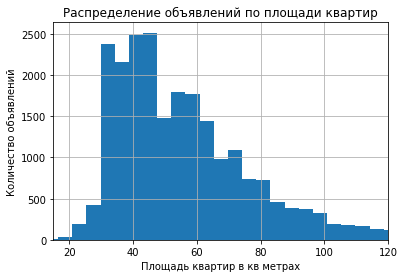

In [105]:
data['total_area'].plot(grid=True, kind='hist', bins=200, xlim=(15, 120))
plt.title('Распределение объявлений по площади квартир')
plt.xlabel('Площадь квартир в кв метрах')
plt.ylabel('Количество объявлений')
plt.show()

Как видно по гистограмме, распределение данных в норме. В оcновном в объявлениях преобладают предложения о продаже квартир с площадью от `40 до 69 кв метров`.

#### Рассмотрим параметр жилая площадь квартиры

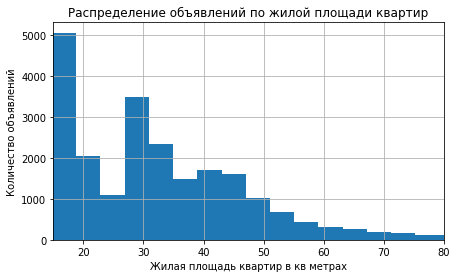

count   23532.00
mean       34.50
std        22.23
min         6.72
25%        19.00
50%        30.00
75%        42.00
max       409.70
Name: living_area, dtype: float64


In [106]:
data['living_area'].plot(grid=True, kind='hist', bins=100, xlim=(15, 80), figsize=(7, 4))
plt.title('Распределение объявлений по жилой площади квартир')
plt.xlabel('Жилая площадь квартир в кв метрах')
plt.ylabel('Количество объявлений')
plt.show()
print(data['living_area'].describe())

Как и с предыдщими данными, с рапсределением у нас все в порядке. Наблюдается сильное отклонение, но в целом на картину это не влияет. В оcновном в объявлениях преобладают предложения о продаже квартир с жилой площадью от `19 до 42 кв метров`. Наблюдается спад предложений в районе `25 кв метров`. Предположим, что это связано с особенностью планировки квартир.

#### Рассмотрим параметр площадь кухни

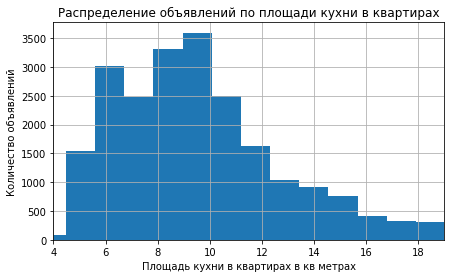

count   23532.00
mean       10.52
std         6.12
min         0.00
25%         7.00
50%         9.01
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64


In [107]:
data['kitchen_area'].plot(grid=True, kind='hist', bins=100, xlim=(4, 19), figsize=(7, 4))
plt.title('Распределение объявлений по площади кухни в квартирах')
plt.xlabel('Площадь кухни в квартирах в кв метрах')
plt.ylabel('Количество объявлений')
plt.show()
print(data['kitchen_area'].describe())

С данными все в порядке. В оcновном в объявлениях преобладают предложения о продаже квартир с площадью кухни от `7 до 12 кв метров`.

#### Рассмотрим параметр цена объекта

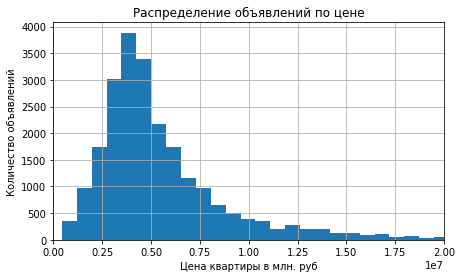

count       23532.00
mean      6538584.30
std      10903033.75
min        430000.00
25%       3400000.00
50%       4650000.00
75%       6799000.00
max     763000000.00
Name: last_price, dtype: float64


In [108]:
data['last_price'].plot(grid=True, kind='hist', bins=1000, figsize=(7, 4), xlim=(0, 20000000))
plt.title('Распределение объявлений по цене')
plt.xlabel('Цена квартиры в млн. руб')
plt.ylabel('Количество объявлений')
plt.show()
print(data['last_price'].describe())

С данными все в порядке. Основное количество объявлений находится в ценовом диапозоне от `3.4 млн руб до 6.8 млн. руб` за квартиру.

#### Рассмотрим параметр количество комнат

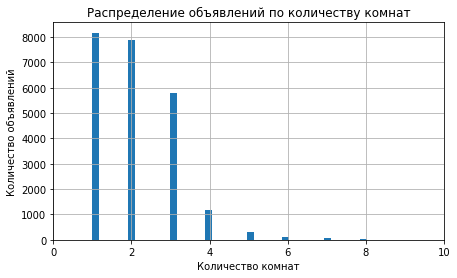

count   23532.00
mean        2.08
std         1.07
min         1.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64


In [109]:
data['rooms'].plot(grid=True, kind='hist', bins=100, figsize=(7, 4), xlim=(0, 10))
plt.title('Распределение объявлений по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()
print(data['rooms'].describe())

С данными все в порядке. Основное количество объявлений это от `1 до 2` комнатные квартиры.

#### Рассмотрим параметр высота потолков

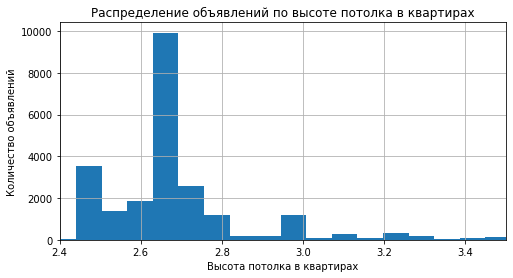

count   23532.00
mean        2.70
std         0.23
min         2.00
25%         2.60
50%         2.65
75%         2.70
max         8.30
Name: ceiling_height, dtype: float64


In [110]:
data['ceiling_height'].plot(grid=True, kind='hist', bins=100, figsize=(8, 4), xlim=(2.4, 3.5))
plt.title('Распределение объявлений по высоте потолка в квартирах')
plt.xlabel('Высота потолка в квартирах')
plt.ylabel('Количество объявлений')
plt.show()
print(data['ceiling_height'].describe())

 С данными все в порядке. Основное количество объявлений составляют квартиры с высотой потолка от `2.6м до 2.7м`

#### Рассмотрим параметр тип этажа

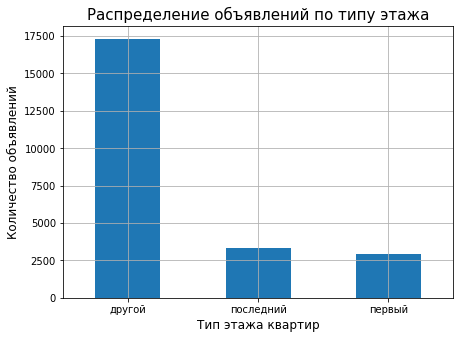

count      23532
unique         3
top       другой
freq       17303
Name: floor_apart, dtype: object


In [111]:
data['floor_apart'].value_counts().plot(grid=True, kind='bar', figsize=(7, 5))
plt.xticks(rotation=0)
plt.title('Распределение объявлений по типу этажа', size=15)
plt.xlabel('Тип этажа квартир', size=12)
plt.ylabel('Количество объявлений', size=12)
plt.show()
print(data['floor_apart'].describe())

С данными все в порядке. В основном преобладают в объявлениях квартиры находящиеся между первым и последним этажами, самые редкие - первый этаж.

#### Рассмотрим параметр общее количество этажей в доме

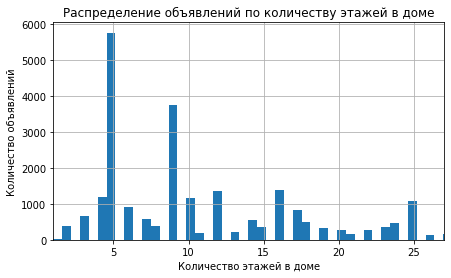

count   23532.00
mean       10.67
std         6.59
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64


In [112]:
data['floors_total'].plot(grid=True, kind='hist', bins=100, figsize=(7, 4), xlim=(1, 27))
plt.title('Распределение объявлений по количеству этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объявлений')
plt.show()
print(data['floors_total'].describe())

С данными все в порядке. В основном в объявлениях преобладают дома `5и и 9и` этажные.

#### Рассмотрим параметр расстояние до центра города в метрах

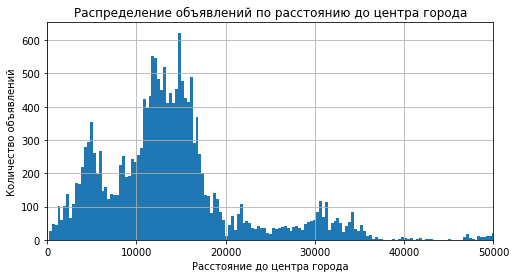

count   18038.00
mean    14196.37
std      8616.57
min       181.00
25%      9238.00
50%     13102.50
75%     16293.00
max     65968.00
Name: cityCenters_nearest, dtype: float64


In [113]:
data['cityCenters_nearest'].plot(grid=True, kind='hist', bins=200, figsize=(8, 4), xlim=(0, 50000))
plt.title('Распределение объявлений по расстоянию до центра города')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Количество объявлений')
plt.show()
print(data['cityCenters_nearest'].describe())

С данными все в порядке. В основном в объявлениях преобладают квартиры с расстоянием до центра города от `10.5 до 15км`

#### Рассмотрим параметр расстояние до ближайшего парка

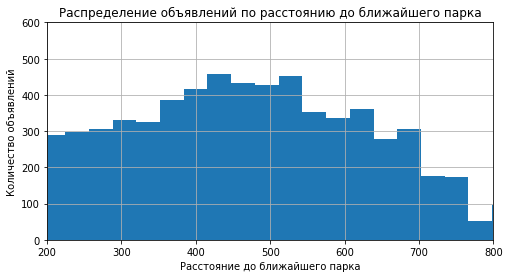

count   8015.00
mean     490.54
std      341.75
min        1.00
25%      288.00
50%      455.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64


In [120]:
data['parks_nearest'].plot(grid=True, kind='hist', bins=100, figsize=(8, 4), xlim=(200, 800), ylim=(0, 600))
plt.title('Распределение объявлений по расстоянию до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество объявлений')
plt.show()
print(data['parks_nearest'].describe())

С данными все в порядке. Основное количество объявлений составляют квартиры с расстоянием до ближайшего парка в `455м`.

#### Изучим, как быстро продавались квартиры (столбец days_exposition)

count   20363.00
mean      180.86
std       219.85
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64


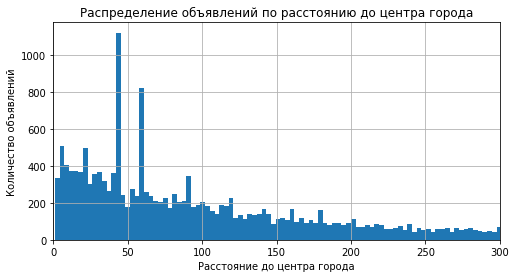

In [122]:
data['days_exposition'].plot(grid=True, kind='hist', bins=500, figsize=(8, 4), xlim=(0, 300))
plt.title('Распределение объявлений по расстоянию до центра города')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Количество объявлений')
print(data['days_exposition'].describe())

Как видно по гистограмме, наибольшее количество продаж находится в пределах `100 дней`. О чем нам и говорит медиана равная `95` дням. Средняя сильно отличается, `489 дней`, что говорит о присутствии сильных выбросах в данных.

Самая быстрая продажа составляет `1 день`, в первом квартиле (25% от всех данных) находятся продажи в течении `45 дней`, необычайно длинными можно считать продажи в течении более `200 дней` находящиеся за пределами 3 квартиля.
На графике выделяются всплески продаж в районе `45, 60 и 90 дней`. Сроки, в течение которых объявление о продаже считается актуальным в яндекс-недвижимости в зависимости от региона, типа объекта составляют `30, 45, 60, 90 дней`, по истечении которого объявление автоматически закрывается. Скорее всего с этим и связаны всплески продаж на этих сроках.

#### Определим факторы, которые больше всего влияют на стоимость объекта

Посмотрим на общую картину корреляции цены квартиры от таких параметров как: `общая площадь, жилая площадь, площадь кухни, количество комнат, тип этажа, день недели (месяца, года) публикации`

In [123]:
data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms', 'floor_apart', 'weekday','month_exposition','year_exposition']).corr(),'\n'

(                  kitchen_area  last_price  living_area  month_exposition  \
 kitchen_area              1.00        0.29         0.12             -0.02   
 last_price                0.29        1.00         0.62             -0.02   
 living_area               0.12        0.62         1.00             -0.16   
 month_exposition         -0.02       -0.02        -0.16              1.00   
 rooms                     0.15        0.44         0.90             -0.29   
 total_area                0.43        0.73         0.92             -0.06   
 weekday                   0.49        0.32         0.07              0.27   
 year_exposition          -0.31       -0.06        -0.06             -0.36   
 
                   rooms  total_area  weekday  year_exposition  
 kitchen_area       0.15        0.43     0.49            -0.31  
 last_price         0.44        0.73     0.32            -0.06  
 living_area        0.90        0.92     0.07            -0.06  
 month_exposition  -0.29       -0.06

Как мы видим особой корреляции среди данных нет, что кажется странным. Возможно это связанно с наличием выбросов в данных. Проведем предообработку данных в колонках: `общая площадь, жилая площадь, площадь кухни, количество комнат, цена` для уменьшения количествва выбросов данных.

In [124]:
def quartile_range(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    dfq = data.loc[(data[column] < q3 + 1.5*iqr) & (data[column] > q1 - 1.5*iqr), column]
    return dfq


list_features = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

In [125]:
data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms', 'floor_apart', 'weekday','month_exposition','year_exposition']).corr(),'\n'

(                  kitchen_area  last_price  living_area  month_exposition  \
 kitchen_area              1.00        0.45        -0.17              0.20   
 last_price                0.45        1.00         0.73              0.03   
 living_area              -0.17        0.73         1.00             -0.15   
 month_exposition          0.20        0.03        -0.15              1.00   
 rooms                    -0.20        0.55         0.90             -0.29   
 total_area                0.28        0.91         0.92             -0.03   
 weekday                   0.63        0.67         0.17              0.27   
 year_exposition           0.21        0.07        -0.03             -0.36   
 
                   rooms  total_area  weekday  year_exposition  
 kitchen_area      -0.20        0.28     0.63             0.21  
 last_price         0.55        0.91     0.67             0.07  
 living_area        0.90        0.92     0.17            -0.03  
 month_exposition  -0.29       -0.03

После обработки показатели корреляции изменились и появилась четка картина зависимости цены.
Наибольшая зависимость прослеживается от:
* общей площади
* жилой площади

В меньшей степени цена зависит от:
* дня недели публикации
* количества комнат
* площади кухни

Построим графики для наглядности и потверждения предварительного вывода

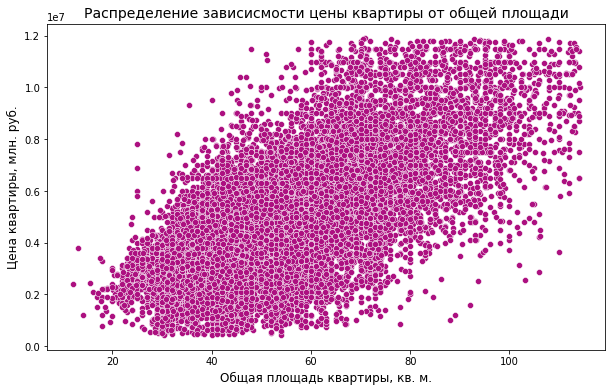

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_area', y='last_price', color='#AC1080')

plt.title('Распределение зависисмости цены квартиры от общей площади', size=14)
plt.xlabel('Общая площадь квартиры, кв. м.', size=12)
plt.ylabel('Цена квартиры, млн. руб.', size=12)
plt.show()

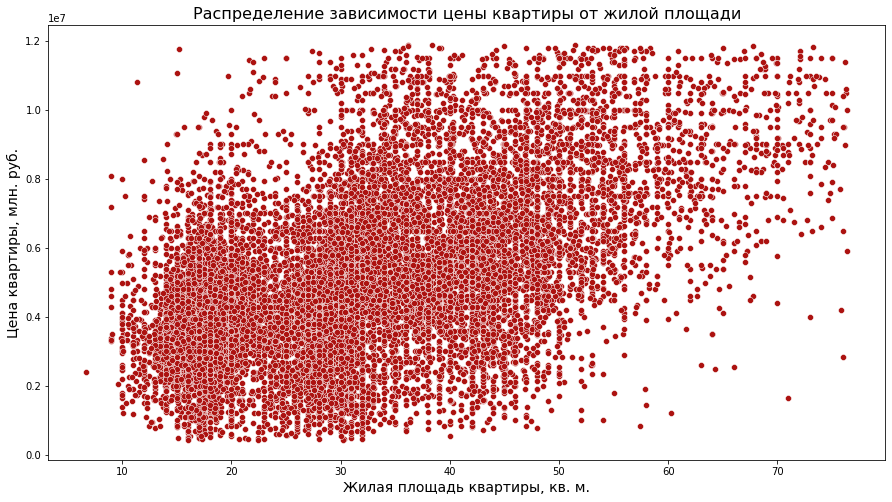

In [128]:
plt.figure(figsize=(15, 8))

sns.scatterplot(data=data, x='living_area', y='last_price', color='#AC1210')
plt.title('Распределение зависимости цены квартиры от жилой площади', size=16)
plt.xlabel('Жилая площадь квартиры, кв. м.', size=14)
plt.ylabel('Цена квартиры, млн. руб.', size=14)

plt.show()

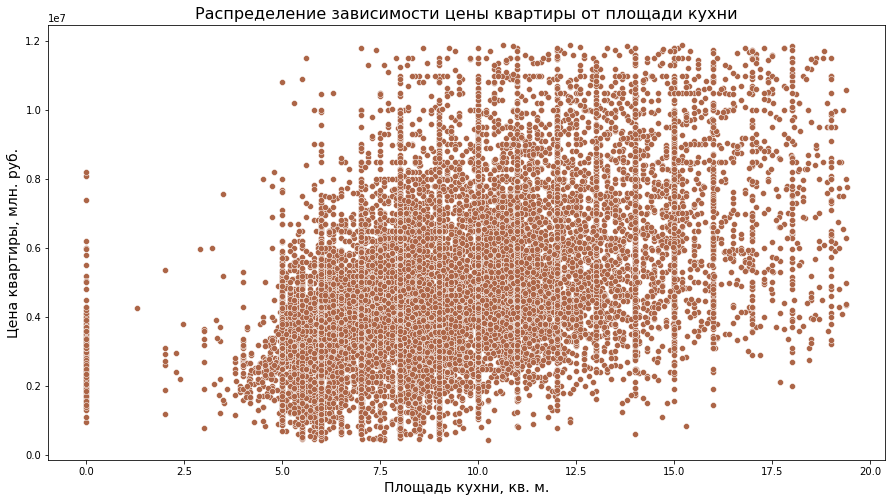

In [129]:
plt.figure(figsize=(15, 8))

sns.scatterplot(data=data, x='kitchen_area', y='last_price', color='#AC6547')
plt.title('Распределение зависимости цены квартиры от площади кухни',size=16)
plt.xlabel('Площадь кухни, кв. м.', size=14)
plt.ylabel('Цена квартиры, млн. руб.', size=14)

plt.show()

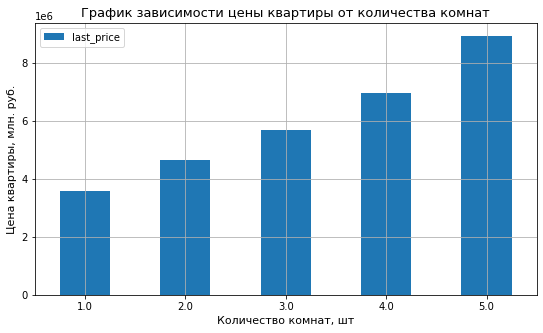

In [130]:
data.pivot_table(index='rooms', values='last_price', aggfunc=('median')).plot(kind='bar', grid=True, figsize=(9, 5))
plt.xticks(rotation=0)
plt.title('График зависимости цены квартиры от количества комнат', size=13)
plt.xlabel('Количество комнат, шт', size=11)
plt.ylabel('Цена квартиры, млн. руб.', size=11)
plt.show()

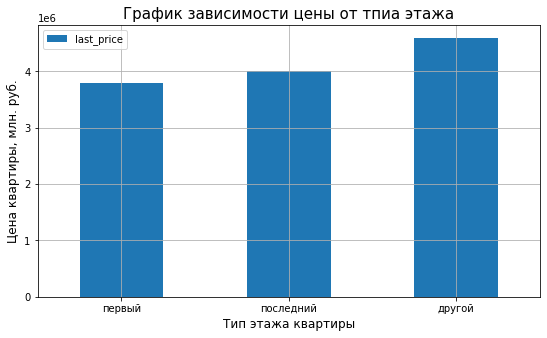

In [131]:
(
    data.pivot_table(index='floor_apart', values='last_price', aggfunc=('median'))
    .sort_values('last_price')
    .plot(kind='bar', grid=True, figsize=(9, 5))
)
plt.xticks(rotation=0)
plt.title('График зависимости цены от тпиа этажа', size=15)
plt.xlabel('Тип этажа квартиры', size=12)
plt.ylabel('Цена квартиры, млн. руб.', size=12)

plt.show()

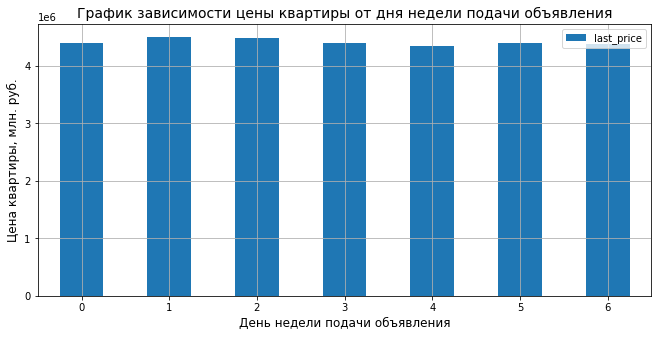

In [132]:
(
    data.pivot_table(index='weekday', values='last_price', aggfunc=('median'))
    .plot(kind='bar', figsize=(11, 5), grid=True)
)
plt.xticks(rotation=0)
plt.title('График зависимости цены квартиры от дня недели подачи объявления', size=14)
plt.xlabel('День недели подачи объявления', size=12)
plt.ylabel('Цена квартиры, млн. руб.', size=12)
plt.show()

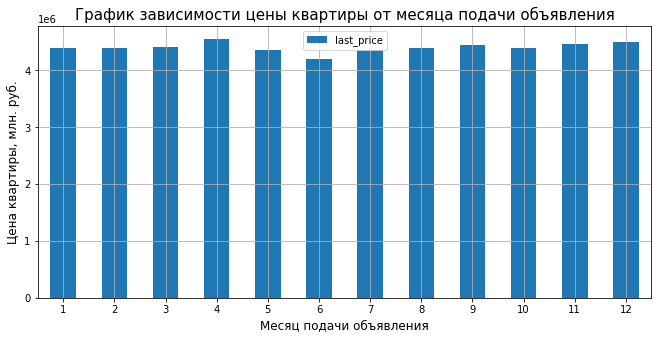

In [133]:
(
    data.pivot_table(index='month_exposition', values='last_price', aggfunc=('median'))
    .plot(kind='bar', figsize=(11, 5), grid=True)
)
plt.xticks(rotation=0)
plt.title('График зависимости цены квартиры от месяца подачи объявления', size=15)
plt.xlabel('Месяц подачи объявления', size=12)
plt.ylabel('Цена квартиры, млн. руб.', size=12)

plt.show()

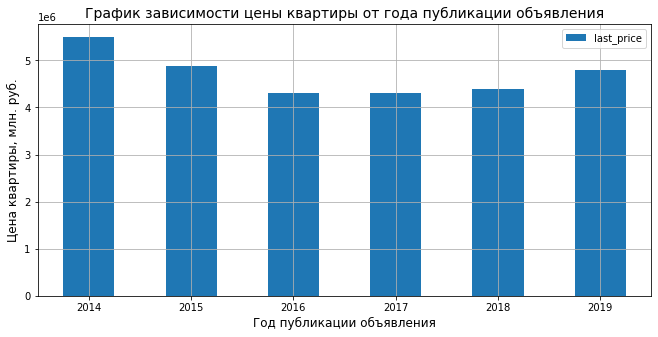

In [134]:
(
    data.pivot_table(index='year_exposition', values='last_price', aggfunc=('median'))
    .plot(kind='bar', figsize=(11, 5), grid=True)
)
plt.xticks(rotation=0)
plt.title('График зависимости цены квартиры от года публикации объявления', size=14)
plt.xlabel('Год публикации объявления', size=12)
plt.ylabel('Цена квартиры, млн. руб.', size=12)

plt.show()

**Как мы видим по графикам:**

* сильная зависимость цены от общей площади квартиры, это пожалуй самый сильный фактор из рассмотренных
* в меньшей степени, но также все еще сильная зависимость цены от жилой площади и количества комнат. Это можно объяснить тем, что в целом эти два параметра непосредственно зависят от общей площади квартиры
* в зависимости от типа этажа, самые недорогие квартиры на первом этаже, далее идут на последнем этаже, а все остальные дороже предыдущих.
* в зависимости от дня и месяца публикации судя по графикам четкой зависимости нет
* зависимость цены от года публикации (если судить в рублях) здесь наблюдается отрицательная корреляция с `2014 ддо 2016 года`, с `2016 до 2017` застой, начиная с `2017 до 2019` положительная корреляция

#### Подсчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [135]:
data_mrice_ln = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
data_mrice_ln.columns = ['count']
data_mrice_ln = data_mrice_ln.sort_values('count', ascending=False).head(10)
data_mrice_ln['price_one_meter'] = data.pivot_table(index='locality_name', values='price_one_meter').round(2)
data_mrice_ln = data_mrice_ln.reset_index()
data_mrice_ln

,locality_name,count,price_one_meter
0,санкт-петербург,13656,114804.28
1,мурино,584,85991.73
2,кудрово,466,95242.23
3,шушары,438,78577.02
4,всеволожск,397,68654.47
5,пушкин,338,103125.82
6,колпино,336,75424.58
7,парголово,327,90175.91
8,гатчина,305,68746.15
9,выборг,236,58141.91


Данные впринципе не являются неожиданностью, в том плане что самая большая средняя цена квадратного метра в санкт-петербурге. На втором и третьем местах находятся пушкин и кудрово, что можно объяснить как малое расстояние до центра города, так и наличием многочосиленных парков.
Самая недорогая средняя цена квадратного метра это выборг, объяснить можно большим удалением от центра города, низкой плотностью застроек.

#### Выделим квартиры в `Санкт-Петербурге` и вычислим их среднюю стоимость на разном удалении от центра

In [136]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday,month_exposition,year_exposition,floor_apart,cityCenters_km
0,20,<NA>,108.00,2019-03-07,3.00,2.70,16,51.00,8,False,...,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16.00
1,7,3350000,40.40,2018-12-04,1.00,2.65,11,18.60,1,False,...,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый,19.00
2,10,5196000,56.00,2015-08-20,2.00,2.65,5,34.30,4,False,...,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14.00
3,0,<NA>,NaN,2015-07-24,3.00,2.65,14,NaN,9,False,...,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой,7.00
4,2,10000000,100.00,2018-06-19,2.00,3.03,14,32.00,13,False,...,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой,8.00


In [137]:
data.query('locality_name == "санкт-петербург"')['cityCenters_km'].describe().round(2)

count   15566.00
mean       11.58
std         4.86
min         0.00
25%         8.00
50%        12.00
75%        15.00
max        29.00
Name: cityCenters_km, dtype: float64

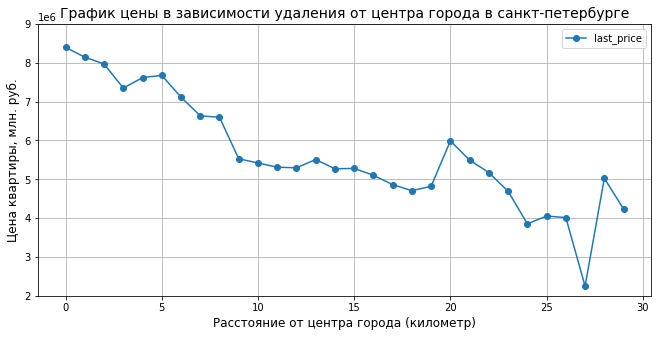

Таблица средней стоимости квартир в зависимости от удаления центра города санкт-петербург


,last_price
cityCenters_km,
0.00,8398000.00
1.00,8145277.22
2.00,7970519.34
3.00,7350002.83
4.00,7619405.79
5.00,7677565.19
6.00,7115833.44
7.00,6636322.24
8.00,6597645.54


In [138]:
(
data.query('locality_name == "санкт-петербург"')
.pivot_table(index='cityCenters_km', values='last_price')
.plot(grid=True, style='o-', ylim=(2*10**6, 9*10**6), figsize=(11, 5))
)
plt.title('График цены в зависимости удаления от центра города в санкт-петербурге', size=14)
plt.xlabel('Расстояние от центра города (километр)', size=12)
plt.ylabel('Цена квартиры, млн. руб.', size=12)
plt.show()
print('Таблица средней стоимости квартир в зависимости от удаления центра города санкт-петербург')
data.query('locality_name == "санкт-петербург"').pivot_table(index='cityCenters_km', values='last_price')

Самые дорогие в среднем цены на квартире в санкт-петербурге находятся в центре и ближе к центру. По мере удаления от центра, средняя цена снижается. До расстояния в `10км` от центра цена снижается более быстрее. На расстоянии от центра в 10км и далее, скорость падения цены значительно снижается, и на расстоянии от центра в 19км цена возврастает на `1 млн. руб`, затем по мере дальнейшего удаления снижатется. Слом динамики на удалении от центра в районе `19-20км` от центра можно объяснить наличием привлектальных зон отдыха и инфраструктуры, необходимой для комфортного проживания.

### Общий вывод

**Общий вывод**

В данной работе мы произвели исследование данных объявлений о продаже квартир.
В процессе исследования нами были выполнены следующие действия.

1) Мы считали файл с данными о продаже квартир в `санкт-петербурге` и ближайших районах. В данных имеются `23699` записи. В данных имеются такие проблемы как:
* пропуски в нескольких колонках
* формат типа данных не везде соответствует типу данных
Необходимо сделать предобработку данных, для возможности их дальнейшего анализа.

2) На данном этапе мы завершили предобработку данных, а именно:
* обработали и заполнили пропуски данных в столбцах: `ceiling_height, floors_total, living_area, kitchen_area, balcony, locality_name, parks_around3000, ponds_around3000, days_exposition`
* проверили данные (и устранили) на содержание аномальных значений
* изменили тип данных в столбцах: `last_price, balcony, days_exposition, floors_total` с вещественного на целый
* изменили тип данных в столбце `first_day_exposition` на формат `datetime64`, в формат визульно лучше воспринимаемый
* проверили на содержание явных и невяных дубликатов данные. Устранили неявные дубликаты в столбце `locality_name`

3) В данном разделе мы добавили новые столбцы с параметрами:
* цена `1 квадратного метра`
* день публикации (0 - понедельник, 1 - вторник, и т.д. )
* месяц публикации объявления
* год публикации объявления
* тип этажа квартиры в объявлении (значения: первый, последний, другой)
* расстояние до центра города в километрах

4) Проведен исследовательский анализ данных
* Изучены и описаны параметры:
    - Среднестатистическое предложение, это квартира в пятиэтажном или девятиэтажном доме средней площадью от `40 до 69 кв. метра` с кухней от `7 до 9 кв. метров`, высотой потолков `2,65 метра`, скорее всего однокомнатная или двухкомнатная на этаже отличном от первого и последнего, на удалении от `10 км. до 15 км`. от центра города.
* Изучено как быстро продавались квартиры:
    - наибольшее количество продаж находится в пределах 100 дней. О чем нам и говорит медиана равная 95 дням. Средняя сильно отличается, 489 дней, что говорит о присутствии сильных выбросах в данных.
    - Самая быстрая продажа составляет `1 день`, в первом квартиле (25% от всех данных) находятся продажи в течении `45 дней`, необычайно длинными можно считать продажи в течении более `200 дней` находящиеся за пределами 3 квартиля.
    - На графике выделяются всплески продаж в районе `45, 60 и 90 дней`. Сроки, в течение которых объявление о продаже считается актуальным в яндекс-недвижимости в зависимости от региона, типа объекта составляют `30, 45, 60, 90 дней`, по истечении которого объявление автоматически закрывается. Скорее всего с этим и связаны всплески продаж на этих сроках.
* Определены факторы, которые больше всего влияют на стоимость объекта
    * сильная зависимость цены от общей площади квартиры, это пожалуй самый сильный фактор из рассмотренных
    * в меньшей степени, но также все еще сильная зависимость цены от жилой площади и количества комнат. Это можно объяснить тем, что в целом эти два параметра непосредственно зависят от общей площади квартиры
    * в зависимости от типа этажа, самые недорогие квартиры на первом этаже, далее идут на последнем этаже, а все остальные дороже предыдущих.
    * в зависимости от дня и месяца публикации судя по графикам четкой зависимости нет
    * зависимость цены от года публикации (если судить в рублях) здесь наблюдается отрицательная корреляция с `2014 ддо 2016` года, с `2016 до 2017` застой, начиная с `2017 до 2019` положительная корреляция
* Подсчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
    - самая большая средняя цена квадратного метра в санкт-петербурге. На втором и третьем местах находятся пушкин и кудрово, что можно объяснить как малое расстояние до центра города, так и наличием многочосиленных парков.
    - Самая недорогая средняя цена квадратного метра это выборг, объяснить можно большим удалением от центра города, низкой плотностью застроек.
* Вычислили среднюю стоимость квартир в Санкт-Петербурге на разном удалении от центра
    - Самые дорогие в среднем цены на квартире в санкт-петербурге находятся в центре и ближе к центру. По мере удаления от центра, средняя цена снижается. До расстояния в `10км` от центра цена снижается более быстрее. На расстоянии от центра в `10км` и далее, скорость падения цены значительно снижается, и на расстоянии от центра в 19км цена возврастает на `1 млн. руб`, затем по мере дальнейшего удаления снижатется. Слом динамики на удалении от центра в районе `19-20км` от центра можно объяснить наличием привлектальных зон отдыха и инфраструктуры, необходимой для комфортного проживания.
        